In [1]:
import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from collections import Counter
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [2]:
dir_files = os.listdir("/content/drive/MyDrive/combined_data")
subs='user01'
user01_files = list(filter(lambda x: subs in x, dir_files))
user01_files

['user01_2020-08-31.csv',
 'user01_2020-09-05.csv',
 'user01_2020-09-07.csv',
 'user01_2020-09-08.csv',
 'user01_2020-09-09.csv',
 'user01_2020-09-12.csv',
 'user01_2020-09-13.csv',
 'user01_2020-09-14.csv',
 'user01_2020-09-15.csv',
 'user01_2020-09-17.csv',
 'user01_2020-09-18.csv',
 'user01_2020-09-19.csv',
 'user01_2020-09-20.csv',
 'user01_2020-09-21.csv',
 'user01_2020-09-22.csv',
 'user01_2020-09-23.csv',
 'user01_2020-09-25.csv',
 'user01_2020-09-26.csv',
 'user01_2020-09-27.csv']

In [3]:
df_list = []
for file in user01_files:
  df = pd.read_csv("/content/drive/MyDrive/combined_data/"+file)
  df_list.append(df)
df_user01 = pd.concat(df_list, ignore_index=True)

In [4]:
df = df_user01[['timestamp','mAcc_x', 'mAcc_y', 'mAcc_z', 'mMag_x', 'mMag_y', 'mMag_z',
       'mGyr_x', 'mGyr_y', 'mGyr_z', 'mGyr_roll', 'mGyr_pitch', 'mGyr_yaw',
       'mGps_lat', 'mGps_lon', 'e4Acc_x', 'e4Acc_y', 'e4Acc_z', 'e4Bvp_val',
       'e4Temp_val', 'e4Hr_val', 'e4Eda_val', 'action']]
df['action'].replace('entertainment','recreation_etc',inplace=True)
df

<ipython-input-4-cd3188ad3e0d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['action'].replace('entertainment','recreation_etc',inplace=True)


,timestamp,mAcc_x,mAcc_y,mAcc_z,mMag_x,mMag_y,mMag_z,mGyr_x,mGyr_y,mGyr_z,...,mGps_lat,mGps_lon,e4Acc_x,e4Acc_y,e4Acc_z,e4Bvp_val,e4Temp_val,e4Hr_val,e4Eda_val,action
0,1598832660004,0.069434,-0.069434,9.703996,-11.20,-15.70,-70.900000,0.000300,0.000497,-0.000398,...,37.482426,126.956290,-0.484375,-0.375000,-0.703125,0.01,33.87,74.00,0.370126,household
1,1598832661061,0.059857,-0.079011,9.715967,-11.20,-15.50,-71.000000,-0.003976,-0.000725,0.000213,...,37.482426,126.956290,-0.484375,-0.375000,-0.703125,0.01,33.87,74.00,0.370126,household
2,1598832662141,0.069434,-0.062251,9.699207,-11.30,-15.70,-71.200005,0.001522,0.001718,-0.002842,...,37.482426,126.956290,-0.484375,-0.375000,-0.703125,0.01,33.87,74.00,0.370126,household
3,1598832663216,0.064645,-0.064645,9.696813,-11.50,-15.80,-70.600000,0.002826,0.000555,-0.001052,...,37.482426,126.956290,-0.484375,-0.375000,-0.703125,0.01,33.87,74.00,0.370126,household
4,1598832664284,0.064645,-0.071828,9.706390,-11.30,-15.70,-70.800000,0.000382,-0.001889,-0.001052,...,37.482426,126.956290,-0.484375,-0.375000,-0.703125,0.01,33.87,74.00,0.370126,household
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506354,1601218735547,0.124502,-0.050280,9.751882,12.30,21.66,-27.300000,0.000239,0.000103,0.000152,...,37.483209,127.012328,-0.734375,-0.609375,-0.140625,-12.32,33.81,88.10,0.019479,recreation_media
506355,1601218736616,0.083800,-0.074223,9.751882,11.82,21.84,-27.359999,-0.000372,-0.001118,-0.000459,...,37.483209,127.012328,-0.656250,-0.718750,-0.156250,15.83,33.83,88.55,0.019479,recreation_media
506356,1601218737689,0.095771,-0.083800,9.720756,11.94,21.60,-27.900000,0.000239,-0.000508,0.000152,...,37.483209,127.012328,-0.640625,-0.734375,-0.109375,3.62,33.81,88.98,0.019479,recreation_media
506357,1601218738767,0.117319,-0.079011,9.766247,12.12,21.66,-27.300000,0.000852,-0.000496,-0.000387,...,37.483209,127.012328,-0.671875,-0.718750,-0.125000,-91.04,33.81,89.47,0.019479,recreation_media


In [5]:
class_to_reduce = ['travel', 'recreation_media', 'work', 'meal']

for i in class_to_reduce:
  # Identify the rows with the specific class
  class_indices = df[df['action'] == i].index

  # Drop every other instance by selecting the odd-indexed rows from the identified indices
  rows_to_remove = class_indices[::2]

  # Drop the selected rows from the DataFrame
  df.drop(rows_to_remove,inplace=True)

print(df)

<ipython-input-5-96ee51186def>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(rows_to_remove,inplace=True)


            timestamp    mAcc_x    mAcc_y    mAcc_z  mMag_x     mMag_y  \
0       1598832660004  0.069434 -0.069434  9.703996  -11.20 -15.700000   
1       1598832661061  0.059857 -0.079011  9.715967  -11.20 -15.500000   
2       1598832662141  0.069434 -0.062251  9.699207  -11.30 -15.700000   
3       1598832663216  0.064645 -0.064645  9.696813  -11.50 -15.800000   
4       1598832664284  0.064645 -0.071828  9.706390  -11.30 -15.700000   
...               ...       ...       ...       ...     ...        ...   
506349  1601218730167  0.088588 -0.035914  9.720756   12.00  21.840000   
506351  1601218732317  0.136474 -0.050280  9.775824   11.94  21.119999   
506353  1601218734467  0.119714 -0.081405  9.785401   12.12  22.439999   
506355  1601218736616  0.083800 -0.074223  9.751882   11.82  21.840000   
506357  1601218738767  0.117319 -0.079011  9.766247   12.12  21.660000   

           mMag_z    mGyr_x    mGyr_y    mGyr_z  ...   mGps_lat    mGps_lon  \
0      -70.900000  0.000300  0.0

Class=2, n=24762 (7.693%)
Class=12, n=59292 (18.420%)
Class=5, n=25470 (7.913%)
Class=3, n=34529 (10.727%)
Class=7, n=50071 (15.555%)
Class=13, n=40570 (12.604%)
Class=11, n=19543 (6.071%)
Class=6, n=19202 (5.965%)
Class=10, n=5304 (1.648%)
Class=1, n=21959 (6.822%)
Class=8, n=8289 (2.575%)
Class=9, n=8886 (2.761%)
Class=4, n=2077 (0.645%)
Class=0, n=1940 (0.603%)


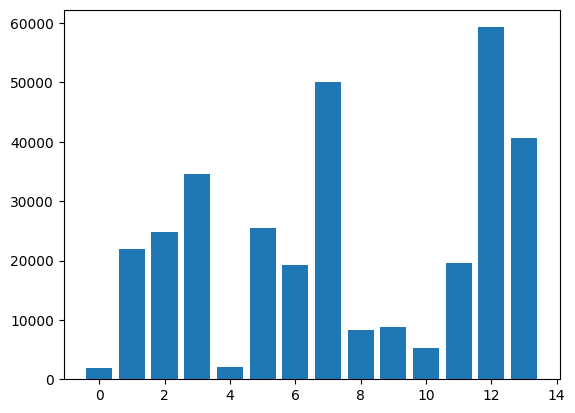

In [6]:
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=2, n=59292 (7.143%)
Class=12, n=59292 (7.143%)
Class=5, n=59292 (7.143%)
Class=3, n=59292 (7.143%)
Class=7, n=59292 (7.143%)
Class=13, n=59292 (7.143%)
Class=11, n=59292 (7.143%)
Class=6, n=59292 (7.143%)
Class=10, n=59292 (7.143%)
Class=1, n=59292 (7.143%)
Class=8, n=59292 (7.143%)
Class=9, n=59292 (7.143%)
Class=4, n=59292 (7.143%)
Class=0, n=59292 (7.143%)


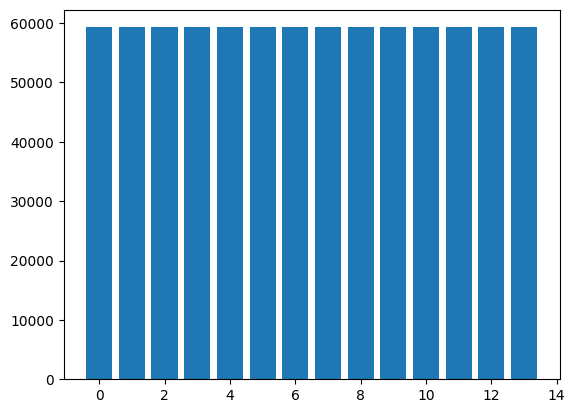

In [10]:
data = df.values
# split into input and output elements
X, y = data[:, 1:-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [14]:
y

,0
0,2
1,2
2,2
3,2
4,2
...,...
830083,13
830084,13
830085,13
830086,13


In [19]:
labels = y[0].unique
labels

<bound method Series.unique of 0          2
1          2
2          2
3          2
4          2
          ..
830083    13
830084    13
830085    13
830086    13
830087    13
Name: 0, Length: 830088, dtype: int64>

In [20]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):


    # to store results at various phases
    results = dict()

    # time at which model starts training
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))


    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))


    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm:
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))

    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(visible=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()

    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)

    # add the trained  model to the results
    results['model'] = model

    return results

In [22]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))

    # Average cross validated score of the best estimator, from the Grid Search
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:02:31.810179


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.039795


---------------------
|      Accuracy      |
---------------------

    0.7176611371457713


--------------------
| Confusion Matrix |
--------------------

 [[17638     0     1     0     0     0     0     0     0     0     0     0
      0     0]
 [    0 12469    61   426     0   234   144  2833     7     0     4    70
    537  1385]
 [    0   156 13408   375     0   432   303   249   126     1     0  1053
   1681     0]
 [    0   801  1351  9030   162  1287    61  1844    22     0   275   307
   1061  1496]
 [    0     0     0   157 17539     0     8     0    15     0     0     0
      0     0]
 [    0   409   778   146     0 11421    15  1426   392     0     0   369
   2281   486]
 [    0  1068   549   183   616    42  8879  2921    45     0   303   385
    985  1869]
 [    5  1598   976   429    46  1044   417  8108   247    16    55 

TypeError: object of type 'method' has no len()

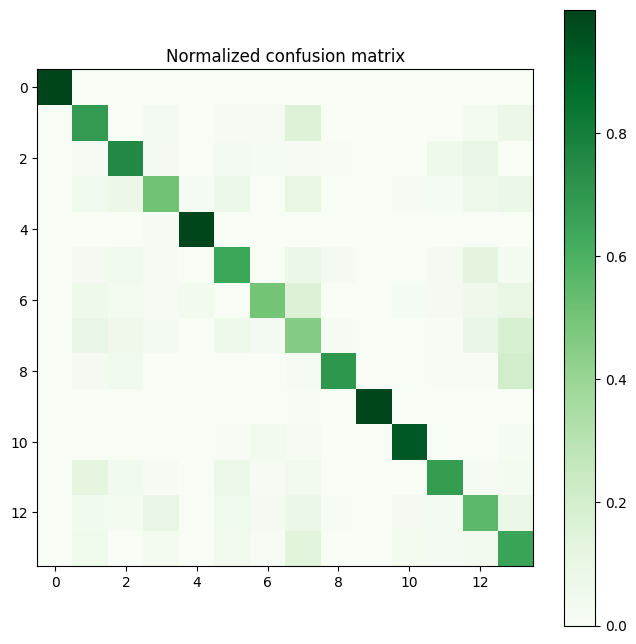

In [23]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])